### Data Analysis Exercise
### Titanic Survived Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
train = pd.read_csv('data/train.csv')


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

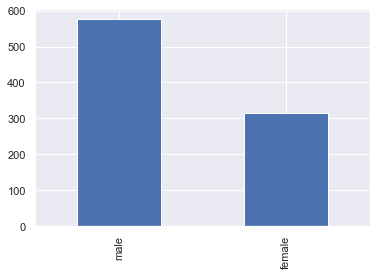

In [6]:
train.Sex.value_counts().plot(kind='bar');

In [7]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))
    

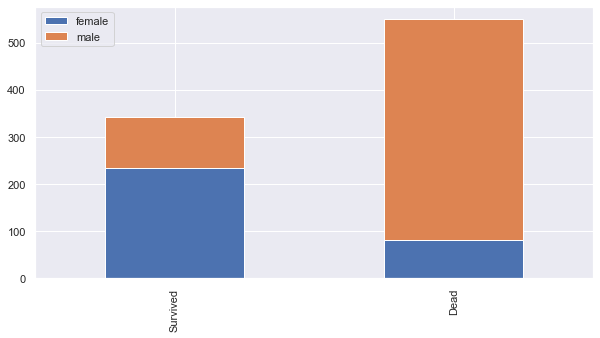

In [8]:
bar_chart('Sex')


In [9]:
train[train.Sex.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [10]:
train[train.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [11]:
train[train.Cabin.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score 

In [14]:
X = train
y = X.pop('Survived')
X.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
X['Age'].fillna(X.Age.mean(), inplace=True)
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
#get just the numeric variables by selecting only the variables that are not objectdatatypes
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
X[numeric_variables].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [17]:
#building first model
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
#only use numerical variables
model.fit(X[numeric_variables], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=False)

In [18]:
model.oob_score_

0.1361695005913669

In [19]:
y_oob = model.oob_prediction_
print("C-stat:", roc_auc_score(y, y_oob))

C-stat: 0.7399551550399983


In [20]:
#simple function to show descriptive stats on the categorical variables
def describe_categorical(X):
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == 'object']].describe().to_html()))

In [21]:
describe_categorical(X)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Richards, Master. William Rowe",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [22]:
#drop some variables
X.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [23]:
#change the cabin variable to be only the first letter or none
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return 'None'
X['Cabin'] = X.Cabin.apply(clean_cabin)

In [24]:
categorical_variables = ['Sex', 'Cabin', 'Embarked']
for variable in categorical_variables:
    #fill missing data with the word 'missing'
    X[variable].fillna("Missing", inplace=True)
    #create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    #update X to include dummies and drop the main variables
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [25]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [26]:
#look at all the columns in the dataset
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(X)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


In [27]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)
print('C-stat:', roc_auc_score(y, model.oob_prediction_))

C-stat: 0.8635211282608464


In [28]:
model.feature_importances_

array([9.11384671e-02, 2.38891052e-01, 4.43567267e-02, 2.15831071e-02,
       2.15047796e-01, 1.43423437e-01, 1.58822440e-01, 2.95342368e-03,
       3.79055011e-03, 6.47116172e-03, 4.30998991e-03, 8.59480266e-03,
       1.02403226e-03, 8.12054428e-04, 2.67741854e-02, 6.64265010e-05,
       1.06189189e-02, 0.00000000e+00, 6.00379221e-03, 1.53176370e-02])

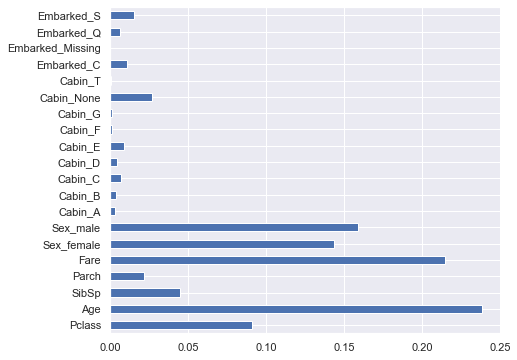

In [29]:
#simple version that shows all of the variables
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
#feature_importances.sort()
feature_importances.plot(kind='barh', figsize=(7,6));

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score 



### n_jobs

In [31]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(X, y)

2.34 s ± 144 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [32]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)

1.91 s ± 75.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### n_estimators

30 trees
C-stat: 0.8538704076524037

50 trees
C-stat: 0.8606983457429244

100 trees
C-stat: 0.8635211282608464

200 trees
C-stat: 0.8621629970493935

500 trees
C-stat: 0.863739494455629

1000 trees
C-stat: 0.864053728735926

2000 trees
C-stat: 0.8634439011919599



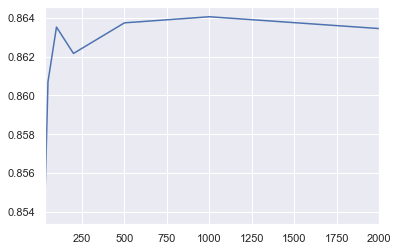

In [33]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]
for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X, y)
    print(trees, 'trees')
    roc = roc_auc_score(y, model.oob_prediction_)
    print('C-stat:', roc)
    results.append(roc)
    print("")
    
    
pd.Series(results, n_estimator_options).plot();

### max features

auto option
C-stat: 0.864053728735926

None option
C-stat: 0.864053728735926

sqrt option
C-stat: 0.8634066191587043

log2 option
C-stat: 0.8634066191587043

0.9 option
C-stat: 0.863545095282225

0.2 option
C-stat: 0.8634066191587043



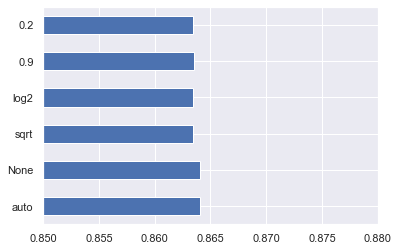

In [34]:
results = []
max_features_options = ['auto', None, 'sqrt', 'log2', 0.9, 0.2]
for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X, y)
    print(max_features, 'option')
    roc = roc_auc_score(y, model.oob_prediction_)
    print('C-stat:', roc)
    results.append(roc)
    print("")
    
pd.Series(results, max_features_options).plot(kind='barh', xlim=(.85, .88))

### mean_samples_leaf

1 min samples
C-stat: 0.864053728735926

2 min samples
C-stat: 0.8696433707218867

3 min samples
C-stat: 0.8715713844416749

4 min samples
C-stat: 0.87347809414246

5 min samples
C-stat: 0.8742636798432022

6 min samples
C-stat: 0.8740293356341673

7 min samples
C-stat: 0.8732890209738068

8 min samples
C-stat: 0.8718616517005933

9 min samples
C-stat: 0.8692785393964572



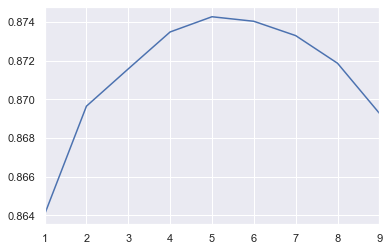

In [35]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features="auto",
                                 min_samples_leaf=min_samples)
    model.fit(X, y)
    print(min_samples, 'min samples')
    roc = roc_auc_score(y, model.oob_prediction_)
    print('C-stat:', roc)
    results.append(roc)
    print("")
    
pd.Series(results, min_samples_leaf_options).plot();

### Final model

In [36]:
model = RandomForestRegressor(n_estimators=1000, n_jobs=-1, oob_score=True, random_state=42, max_features="auto",
                             min_samples_leaf=5)
model.fit(X, y)
roc = roc_auc_score(y, model.oob_prediction_)
print('C-stat:', roc)

C-stat: 0.8742636798432022
